In [ ]:
!nvidia-smi

Wed Jun 25 10:01:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   55C    P8             13W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip -q "Face Detection.v27i.yolov8.zip" -d data


In [ ]:
!cat data/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['face']

roboflow:
  workspace: mohamed-traore-2ekkp
  project: face-detection-mik1i
  version: 27
  license: CC BY 4.0
  url: https://universe.roboflow.com/mohamed-traore-2ekkp/face-detection-mik1i/dataset/27

In [ ]:
!ls data


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
yaml_content = """
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['face']
"""

with open("data/data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# Traning Part


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(data='data/data.yaml', epochs=50, imgsz=640, batch=16)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 119MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2105.3±603.8 MB/s, size: 85.4 KB)


train: Scanning /content/data/train/labels... 132 images, 9 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 1524.28it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1392.1±1027.8 MB/s, size: 88.6 KB)


val: Scanning /content/data/valid/labels... 38 images, 1 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 1085.48it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G      1.337      3.425      1.711         11        640: 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         38         49    0.00412      0.959       0.45      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.09G      1.011      2.257      1.177         12        640: 100%|██████████| 9/9 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         38         49     0.0043          1      0.781      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.12G     0.9489      1.679      1.086         13        640: 100%|██████████| 9/9 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]

                   all         38         49      0.109      0.898      0.656      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.12G     0.9121      1.482      1.067         12        640: 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         38         49          1      0.314      0.672      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G      1.036      1.428      1.108         12        640: 100%|██████████| 9/9 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         38         49          1      0.279      0.748      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G     0.9888      1.539      1.134          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all         38         49      0.677       0.47      0.593      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G     0.9343      1.417      1.084          8        640: 100%|██████████| 9/9 [00:00<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         38         49      0.949       0.38      0.783        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G     0.9585        1.4      1.139         10        640: 100%|██████████| 9/9 [00:00<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]


                   all         38         49      0.821      0.561      0.716      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.042       1.37      1.174         15        640: 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]


                   all         38         49      0.809      0.518      0.682      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.23G     0.9567      1.192      1.123          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         38         49      0.842      0.286      0.475      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.071      1.202      1.195         12        640: 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         38         49      0.497      0.633      0.578      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.27G      1.018      1.271      1.174         10        640: 100%|██████████| 9/9 [00:00<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all         38         49      0.672      0.796      0.745      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.28G     0.9574      1.208      1.109          9        640: 100%|██████████| 9/9 [00:00<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]


                   all         38         49      0.788      0.857      0.843      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.3G     0.9897      1.123      1.167          8        640: 100%|██████████| 9/9 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]

                   all         38         49      0.969      0.918      0.959      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      1.024      1.148      1.167          6        640: 100%|██████████| 9/9 [00:00<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         38         49      0.902      0.937      0.935       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G     0.9758      1.057      1.117         14        640: 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         38         49      0.934      0.939      0.938      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.34G     0.9693      1.034      1.149          6        640: 100%|██████████| 9/9 [00:00<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]


                   all         38         49      0.932      0.918      0.927      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.37G     0.9413      1.014      1.119          9        640: 100%|██████████| 9/9 [00:00<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         38         49      0.877      0.939      0.938      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.39G     0.8824     0.9904      1.102          5        640: 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]

                   all         38         49      0.923      0.939      0.947      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.4G     0.8466     0.9294      1.079          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all         38         49      0.918      0.912      0.958      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G     0.7941     0.8506      1.057         13        640: 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all         38         49       0.93       0.98      0.957      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.44G     0.9098     0.9119      1.129         11        640: 100%|██████████| 9/9 [00:00<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.87it/s]


                   all         38         49      0.939      0.938      0.967      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.46G     0.8402     0.8368      1.072          9        640: 100%|██████████| 9/9 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all         38         49      0.917      0.939      0.967      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.47G     0.9146     0.8364      1.133         12        640: 100%|██████████| 9/9 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]

                   all         38         49      0.917      0.898      0.962      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.48G     0.7884     0.8129      1.067         11        640: 100%|██████████| 9/9 [00:00<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]


                   all         38         49      0.914      0.918      0.954      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.51G     0.7903     0.8173       1.07          7        640: 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]


                   all         38         49      0.899      0.959      0.932      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.53G     0.8195     0.8214      1.102         11        640: 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]


                   all         38         49      0.921      0.958      0.942      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.54G     0.8171       0.83      1.046          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         38         49      0.907      0.993      0.965      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.55G     0.7335     0.7553      1.027          7        640: 100%|██████████| 9/9 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all         38         49      0.917      0.878      0.961      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.58G     0.8052     0.7299      1.026          9        640: 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


                   all         38         49      0.902      0.959      0.967        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.59G      0.793     0.7229      1.019         11        640: 100%|██████████| 9/9 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]


                   all         38         49      0.907      0.994      0.974      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.61G     0.8338     0.7036       1.07          6        640: 100%|██████████| 9/9 [00:00<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]


                   all         38         49      0.923      0.979      0.986      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.62G     0.7273     0.6565      1.014          9        640: 100%|██████████| 9/9 [00:00<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]


                   all         38         49      0.941      0.979      0.978      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.64G     0.7243     0.6739     0.9919          9        640: 100%|██████████| 9/9 [00:00<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]


                   all         38         49       0.94      0.957      0.978      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.66G     0.6753     0.6049     0.9895         12        640: 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         38         49      0.949      0.939       0.98      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.68G     0.7564     0.6827      1.028         10        640: 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.16it/s]

                   all         38         49      0.941      0.977      0.983      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.68G     0.7504     0.7114      1.022          4        640: 100%|██████████| 9/9 [00:00<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all         38         49       0.94       0.98      0.986      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.71G     0.6856     0.5954     0.9696          7        640: 100%|██████████| 9/9 [00:00<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]

                   all         38         49      0.939       0.98      0.987      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.73G     0.6796     0.6322      0.994          8        640: 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all         38         49      0.939       0.98      0.977      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.75G     0.7043      0.602      1.003         10        640: 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]


                   all         38         49      0.941      0.976      0.986      0.725
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.75G     0.6631     0.7147      1.005          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         38         49       0.94      0.958      0.984       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.78G     0.5765     0.6359     0.9093          4        640: 100%|██████████| 9/9 [00:00<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         38         49      0.958      0.933      0.972      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.8G     0.6491     0.6927     0.9703          6        640: 100%|██████████| 9/9 [00:00<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]

                   all         38         49      0.947      0.939      0.973      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.81G     0.6367     0.6705     0.9563          6        640: 100%|██████████| 9/9 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all         38         49      0.964      0.939      0.986      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.82G     0.6041     0.5885     0.9629          5        640: 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]

                   all         38         49      0.962      0.939      0.988      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.85G     0.5986     0.5938     0.9185          5        640: 100%|██████████| 9/9 [00:00<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all         38         49      0.941      0.975      0.989      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.87G     0.5486     0.5639     0.9138          5        640: 100%|██████████| 9/9 [00:00<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         38         49      0.941      0.975      0.989      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.88G     0.5212     0.5544     0.8965          4        640: 100%|██████████| 9/9 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         38         49      0.971      0.939      0.988      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.89G     0.5416      0.605     0.9301          3        640: 100%|██████████| 9/9 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]

                   all         38         49      0.972      0.939      0.987      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.92G      0.504     0.5358     0.9188          3        640: 100%|██████████| 9/9 [00:00<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all         38         49      0.972      0.939      0.986      0.752



50 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]


                   all         38         49      0.971      0.939      0.987      0.755
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5ab1493390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Test Part

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=valid/images save=True

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 985, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 555, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 247, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/torc

In [ ]:
results = model.predict(source="data/test/images", save=True, conf=0.25)


image 1/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0000_jpg.rf.b8844c6c867798aa5992c180730a9198.jpg: 448x640 1 face, 56.1ms
image 2/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0002_jpg.rf.060944fbbd666495bdbea8d2fa9e2d01.jpg: 448x640 1 face, 7.6ms
image 3/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0014_jpg.rf.7f25b9d29aa91b409397e8fa28709ef4.jpg: 448x640 1 face, 7.4ms
image 4/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0053_jpg.rf.9a73888ffd9aad89d0217452c9662e73.jpg: 448x640 2 faces, 7.5ms
image 5/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0055_jpg.rf.0dd9c7cee88e943cb8c88e9b3c4bfbdf.jpg: 448x640 2 faces, 7.4ms
image 6/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0056_jpg.rf.64a82bf7386763f74b25d461382e39f8.jpg: 448x640 2 faces, 7.5ms
image 7/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0059_jpg.rf.e7f99f5fc1f9019c31ca1caab1393e07.jpg: 448x640 2 faces, 7.4ms
image 8

Confusion Matrix

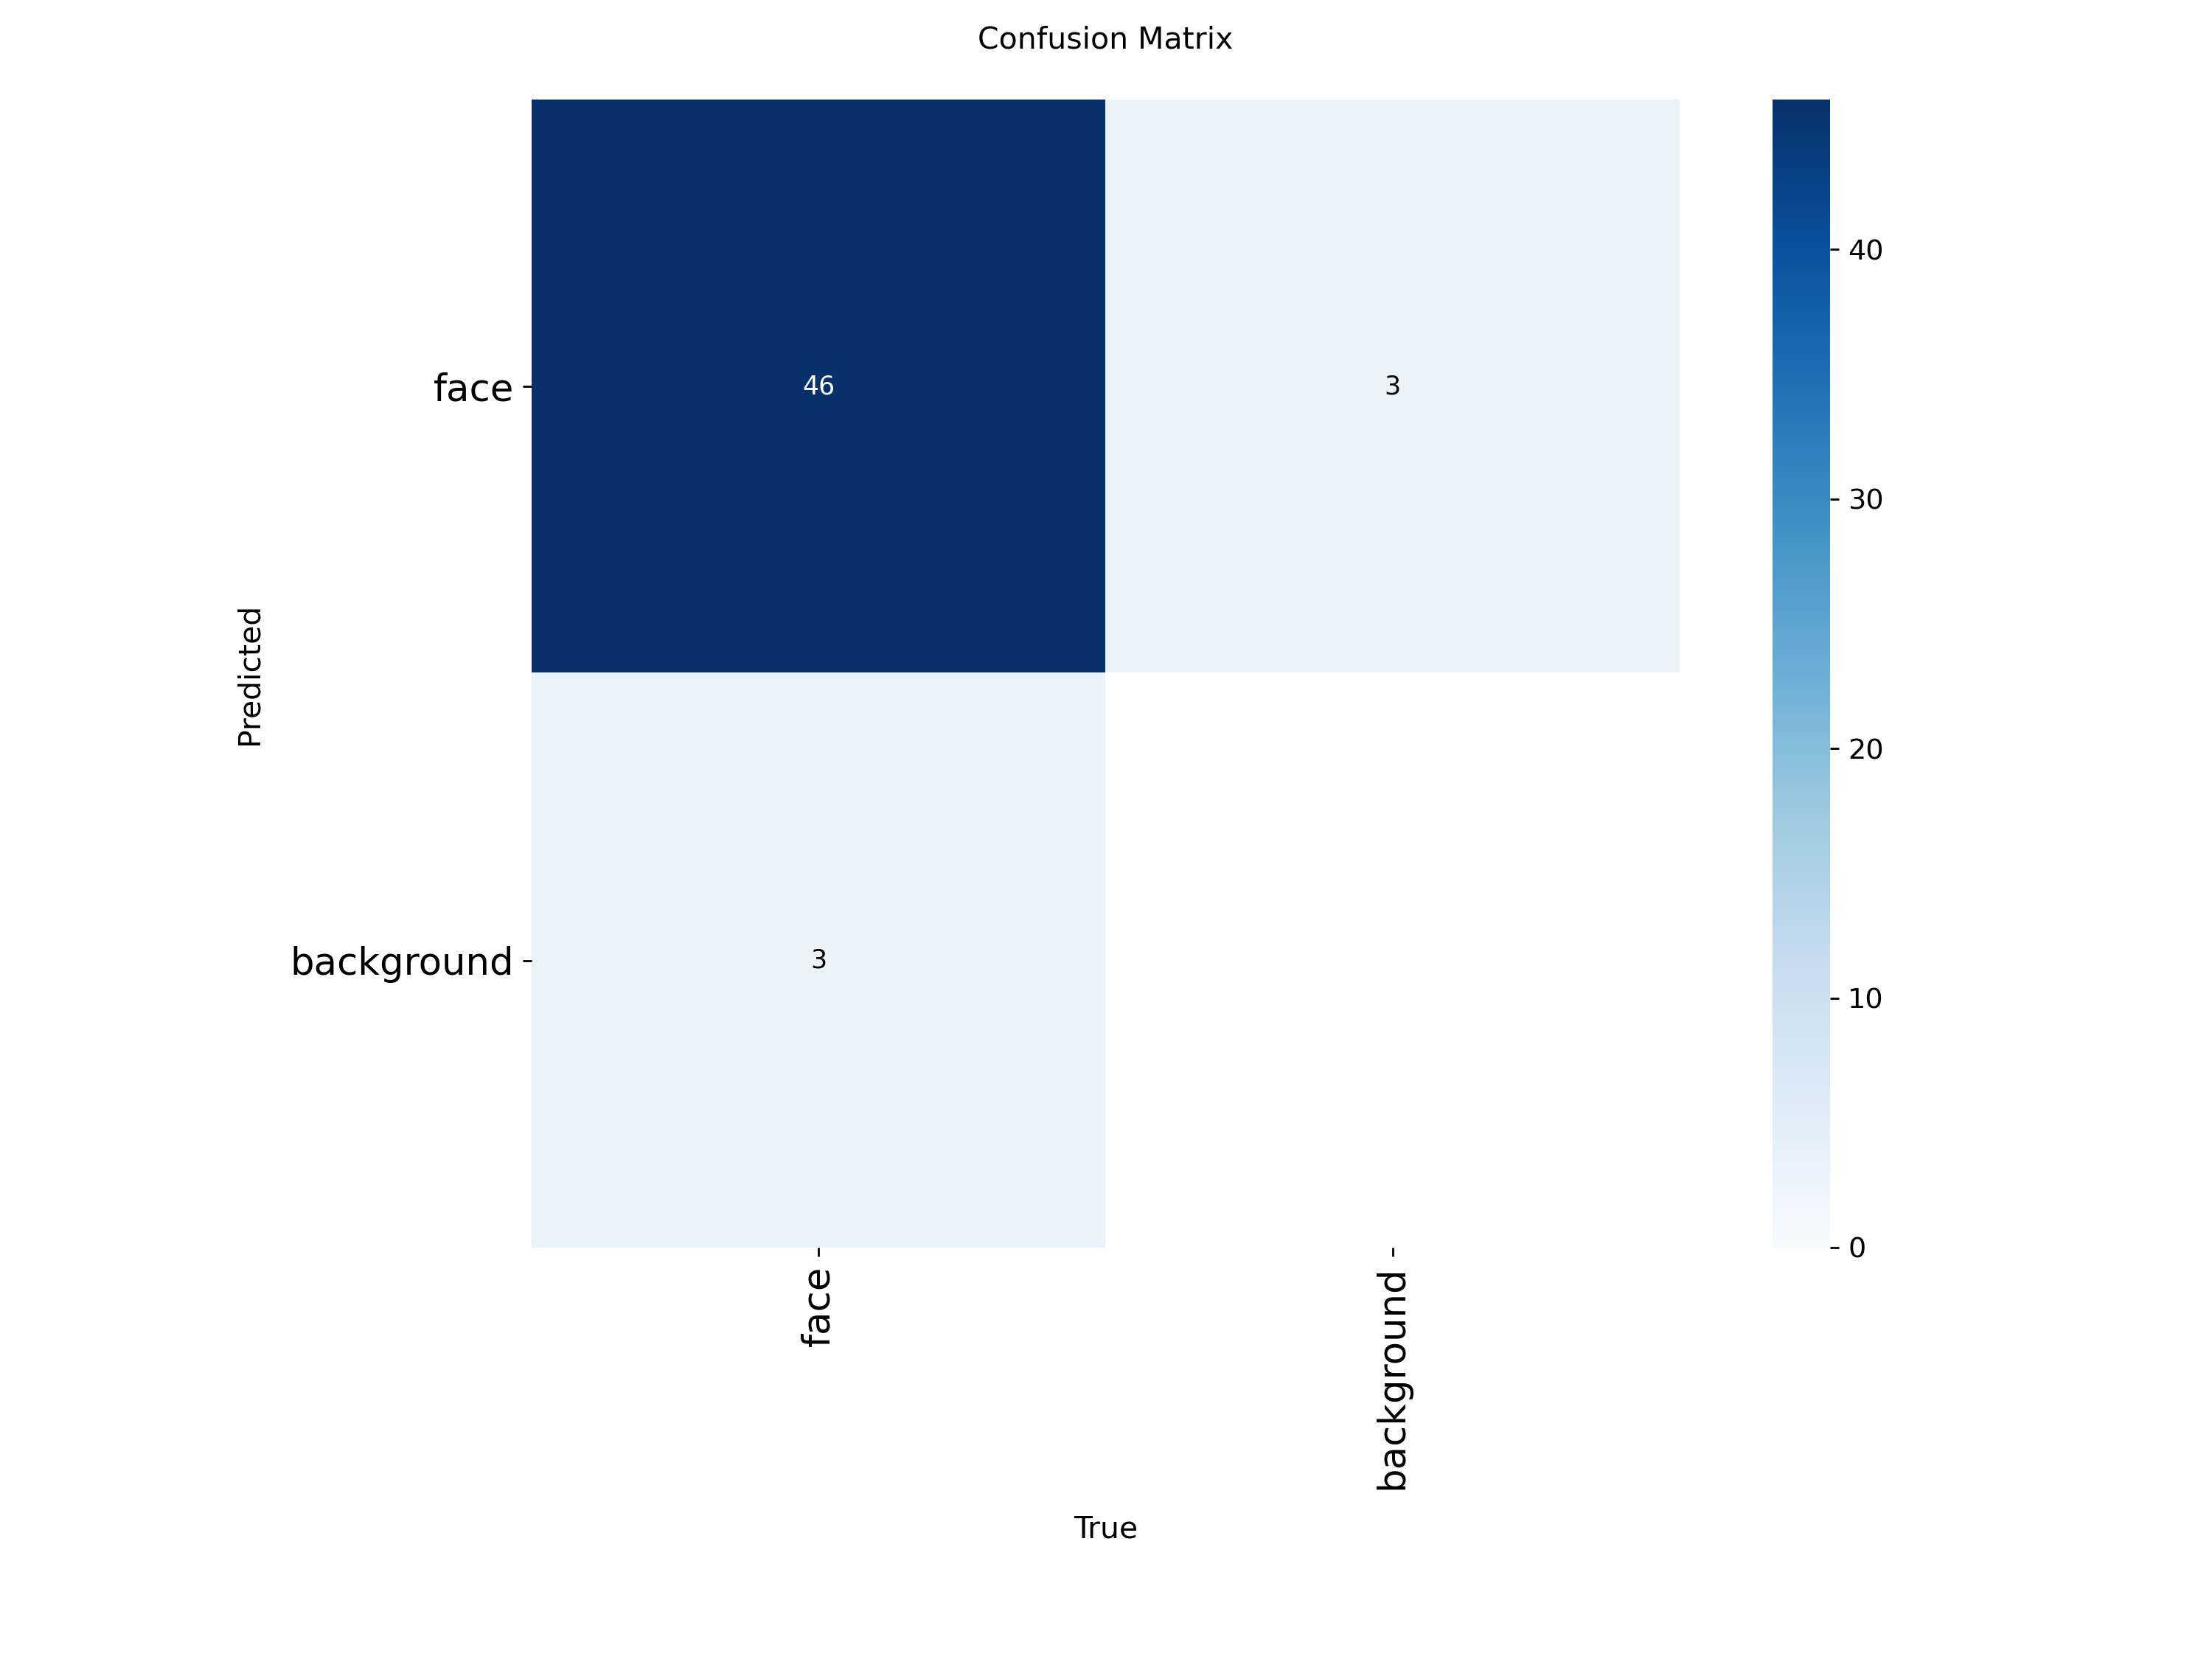

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/detect/train/confusion_matrix.png'))


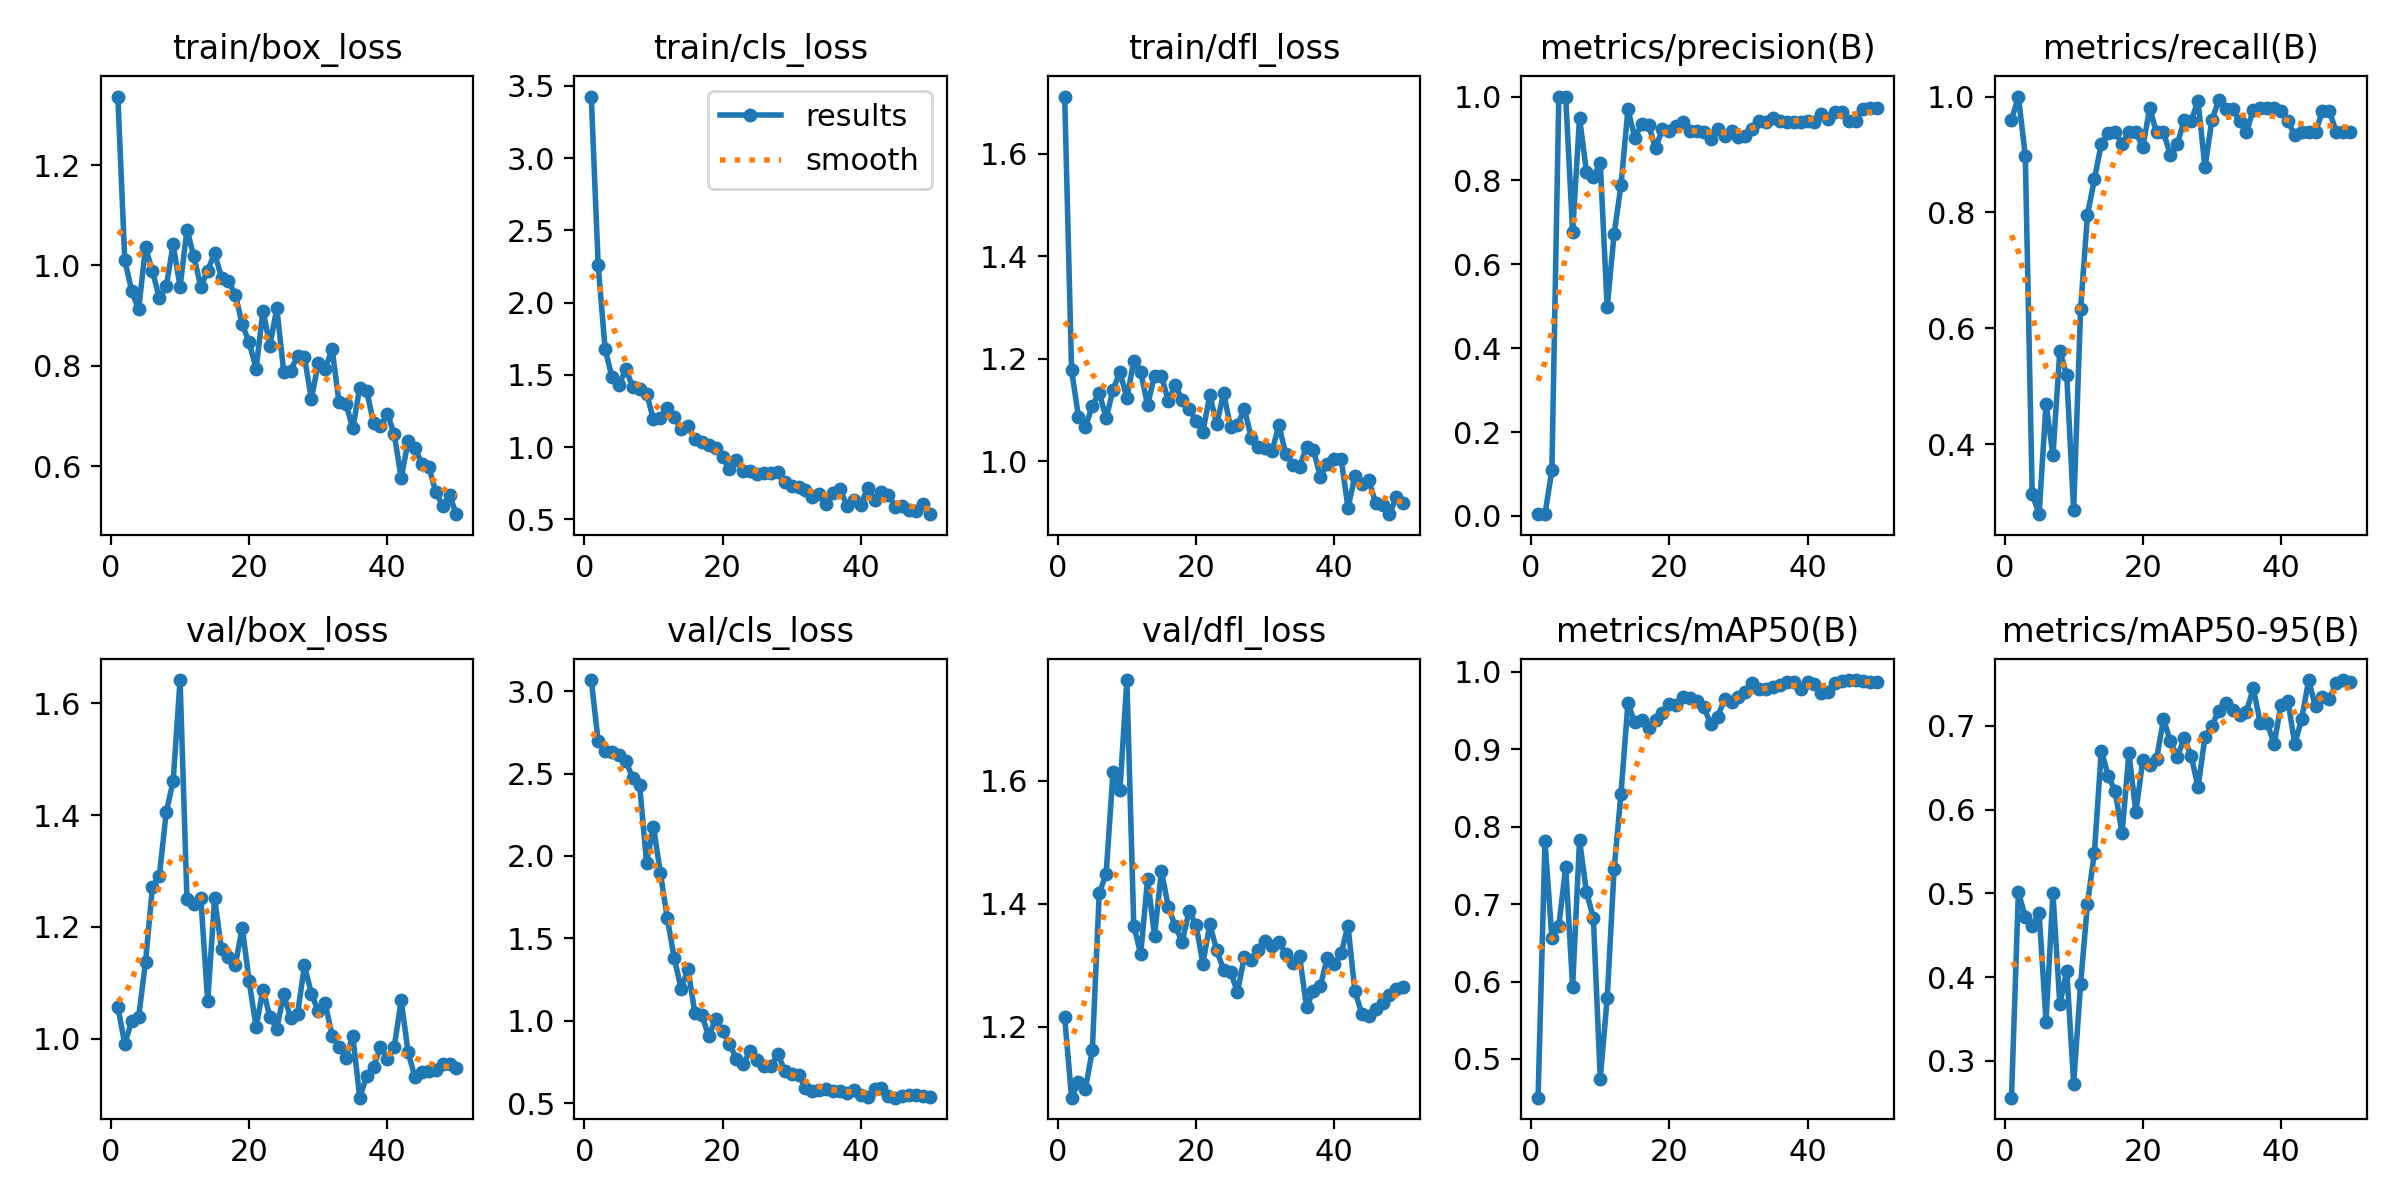

In [ ]:
display(Image(filename='runs/detect/train/results.png', width=600))

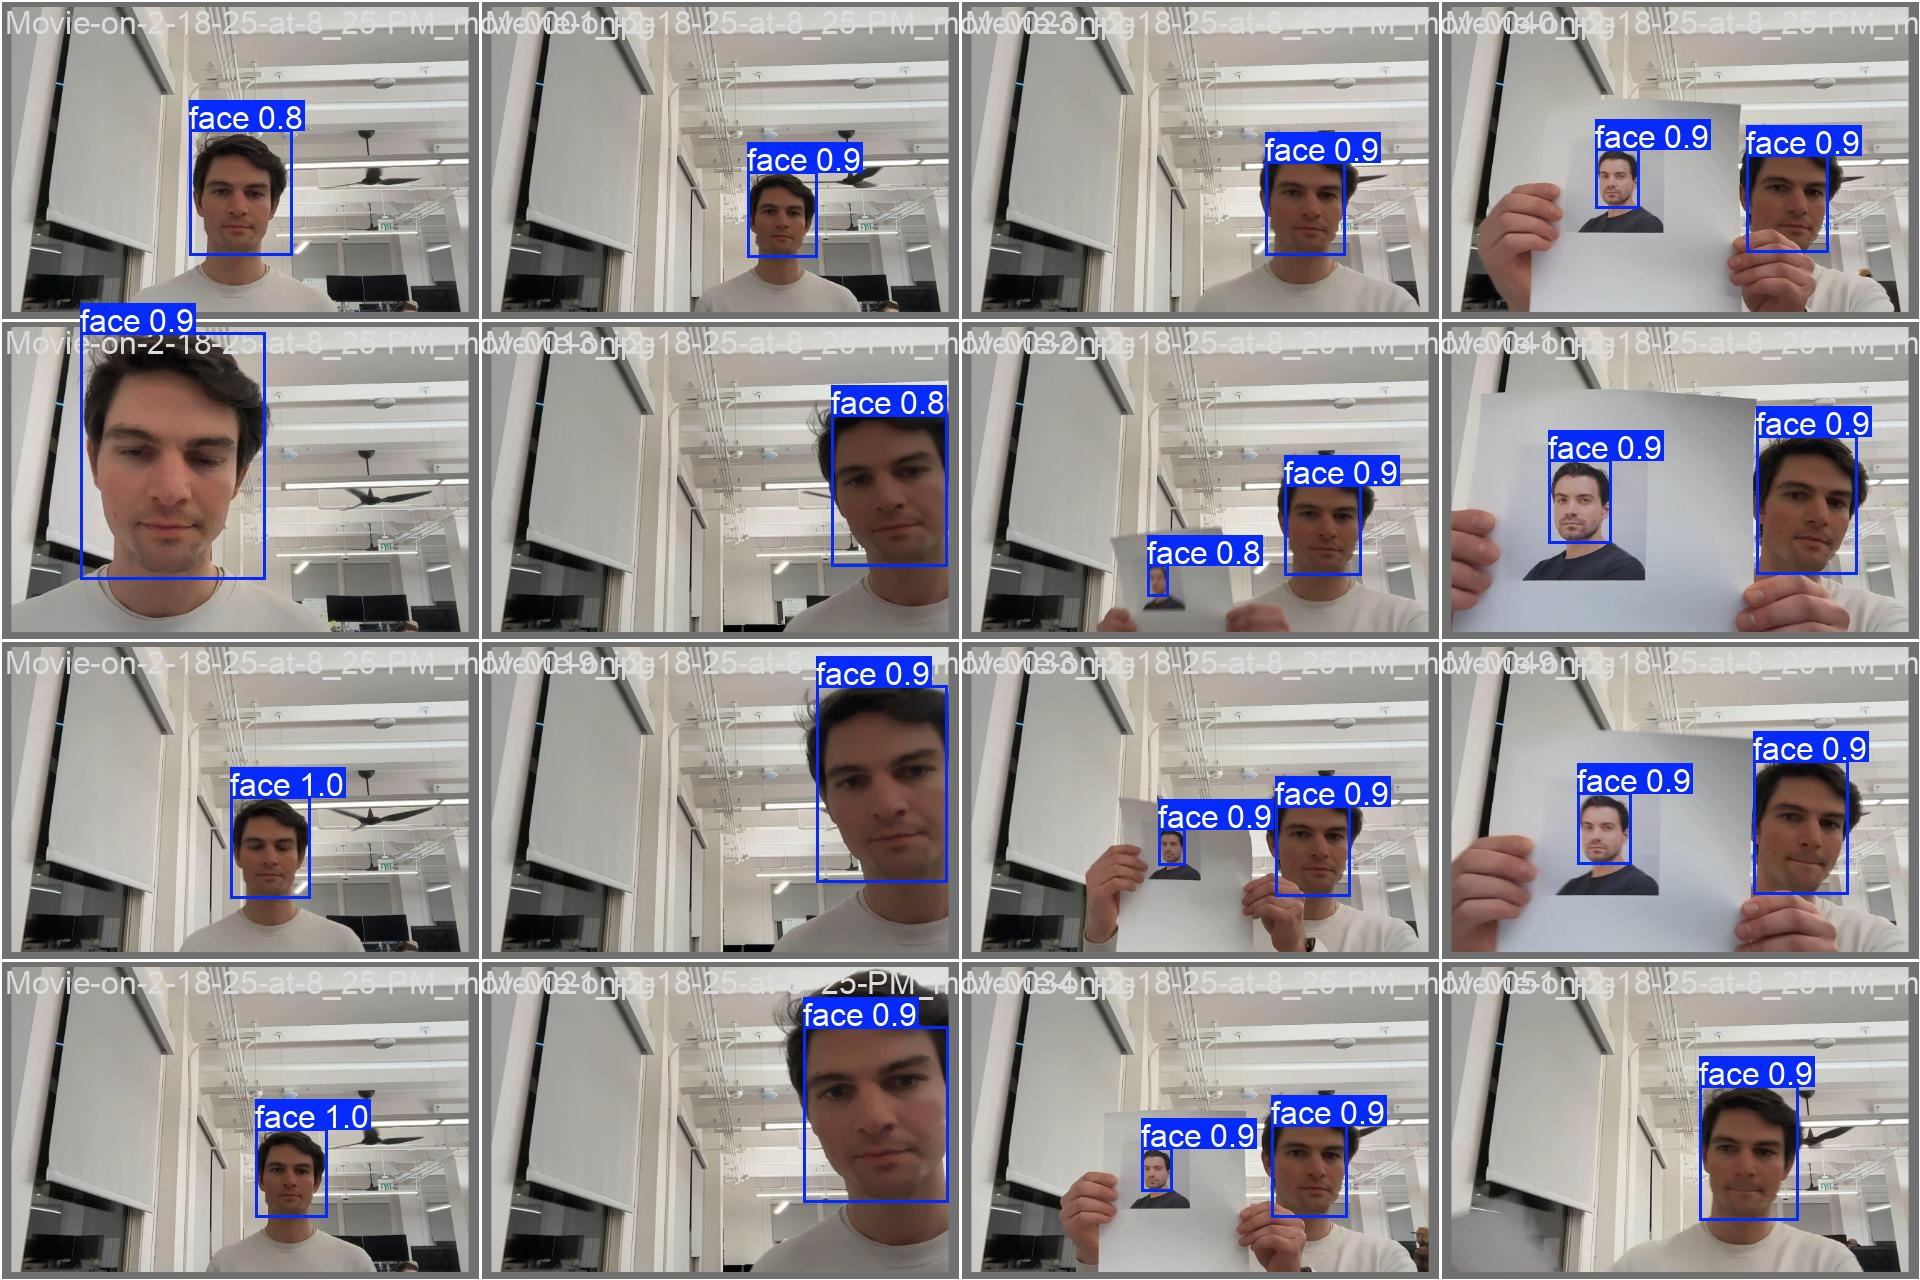

In [ ]:
display(Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600))

# Validation Part

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data/data.yaml

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2449.6±1288.8 MB/s, size: 94.3 KB)
val: Scanning /content/data/valid/labels.cache... 38 images, 1 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:00<00:00,  3.27it/s]
                   all         38         49      0.972      0.939      0.987      0.755
Speed: 2.2ms preprocess, 6.6ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference Part

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images save=True

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0000_jpg.rf.b8844c6c867798aa5992c180730a9198.jpg: 448x640 1 face, 54.2ms
image 2/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0002_jpg.rf.060944fbbd666495bdbea8d2fa9e2d01.jpg: 448x640 1 face, 7.9ms
image 3/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0014_jpg.rf.7f25b9d29aa91b409397e8fa28709ef4.jpg: 448x640 1 face, 7.1ms
image 4/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0053_jpg.rf.9a73888ffd9aad89d0217452c9662e73.jpg: 448x640 2 faces, 6.8ms
image 5/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0055_jpg.rf.0dd9c7cee88e943cb8c88e9b3c4bfbdf.jpg: 448x640 2 faces, 6.8ms
image 6/19 /content/data/test/images/Movie-on-2-18-25-at-8_25-PM_mov-0056_jpg.rf.64a82bf7386763f74b25d461382e39f8.jpg: 448x640 

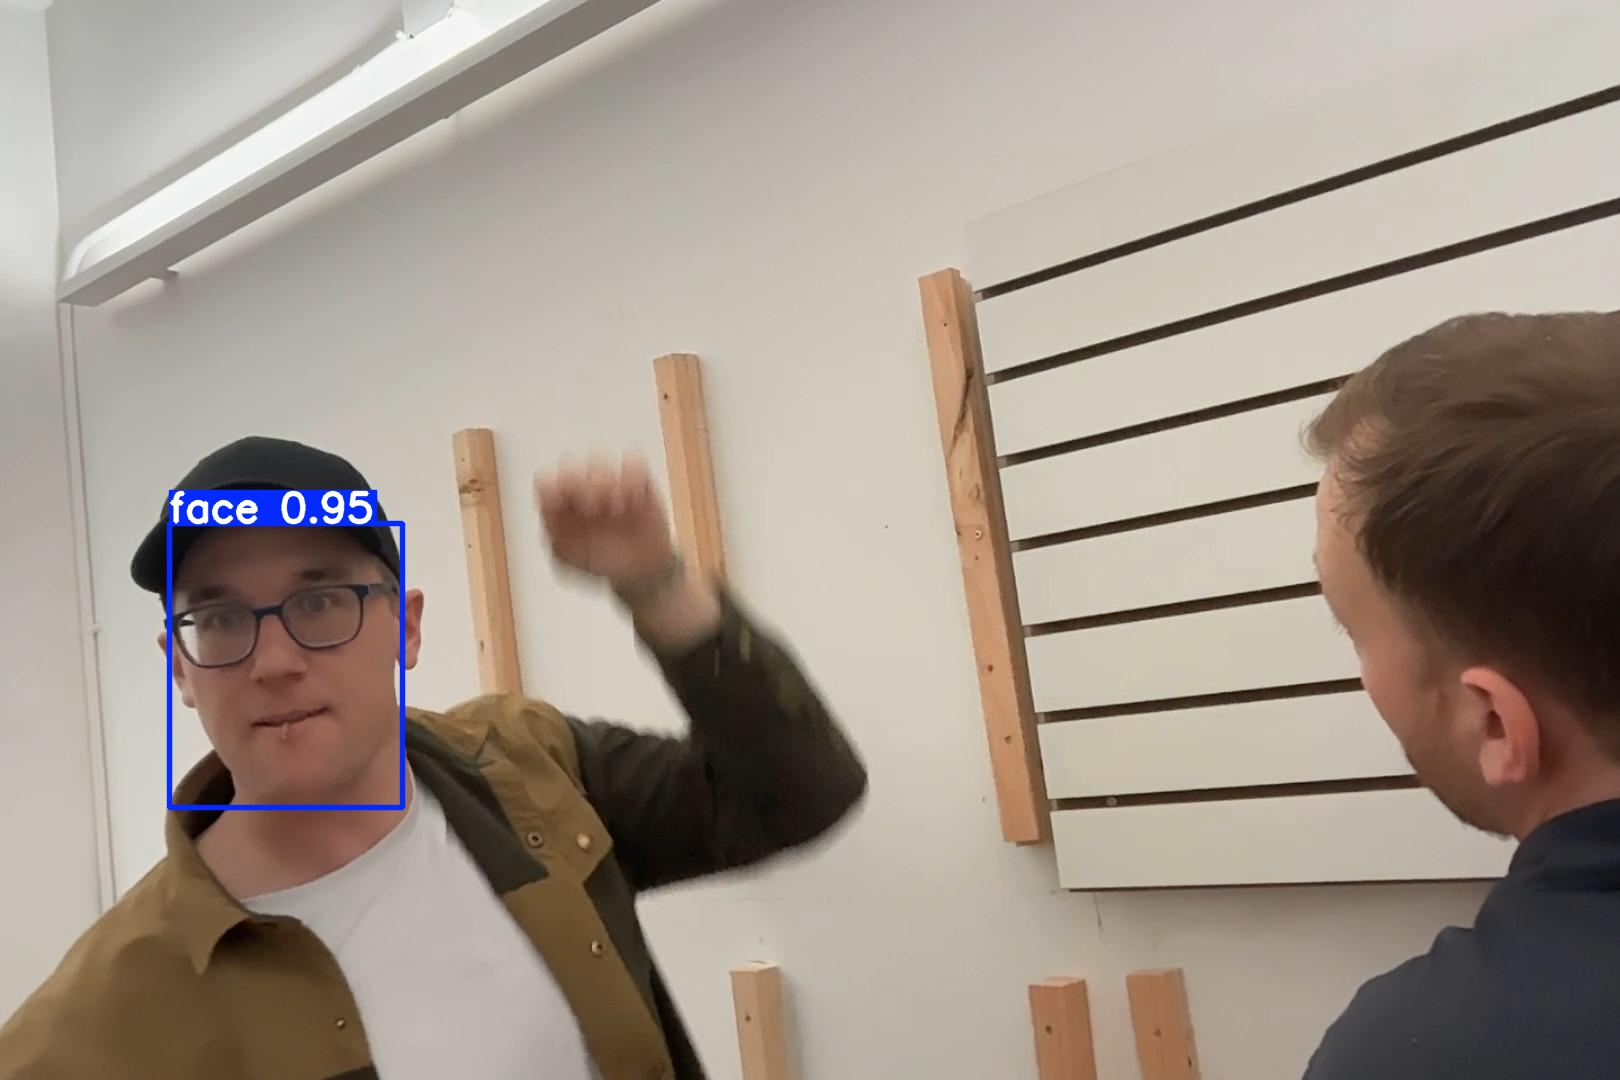

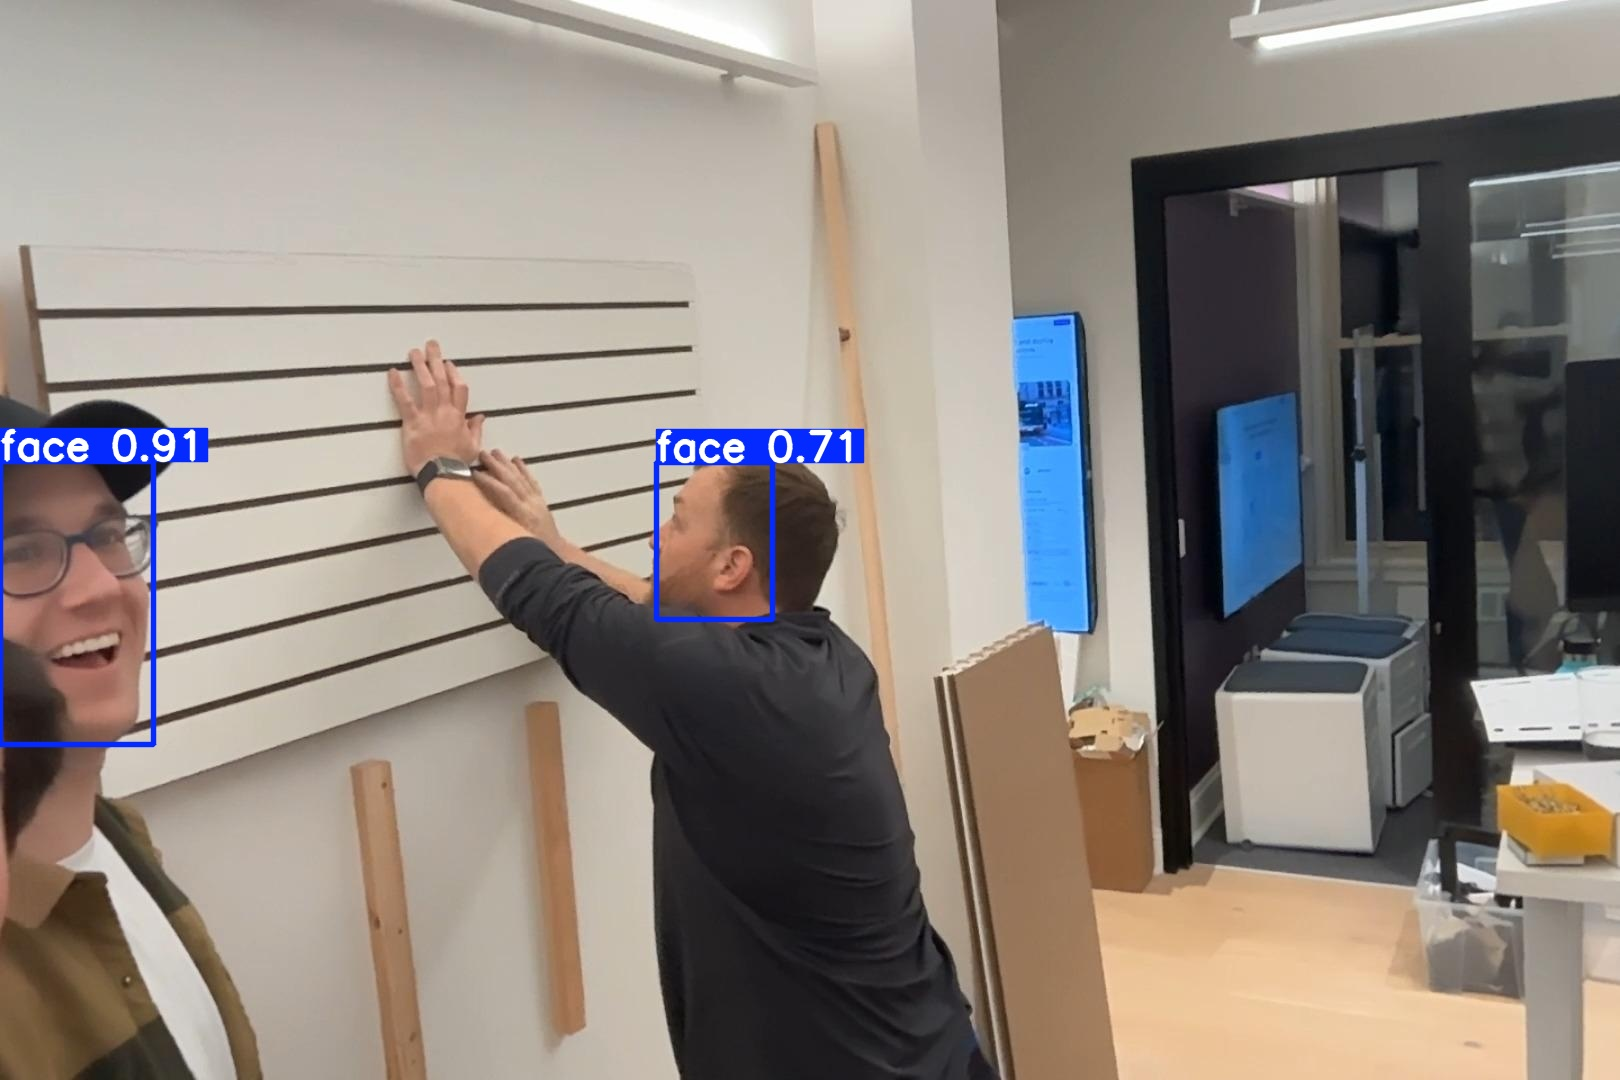

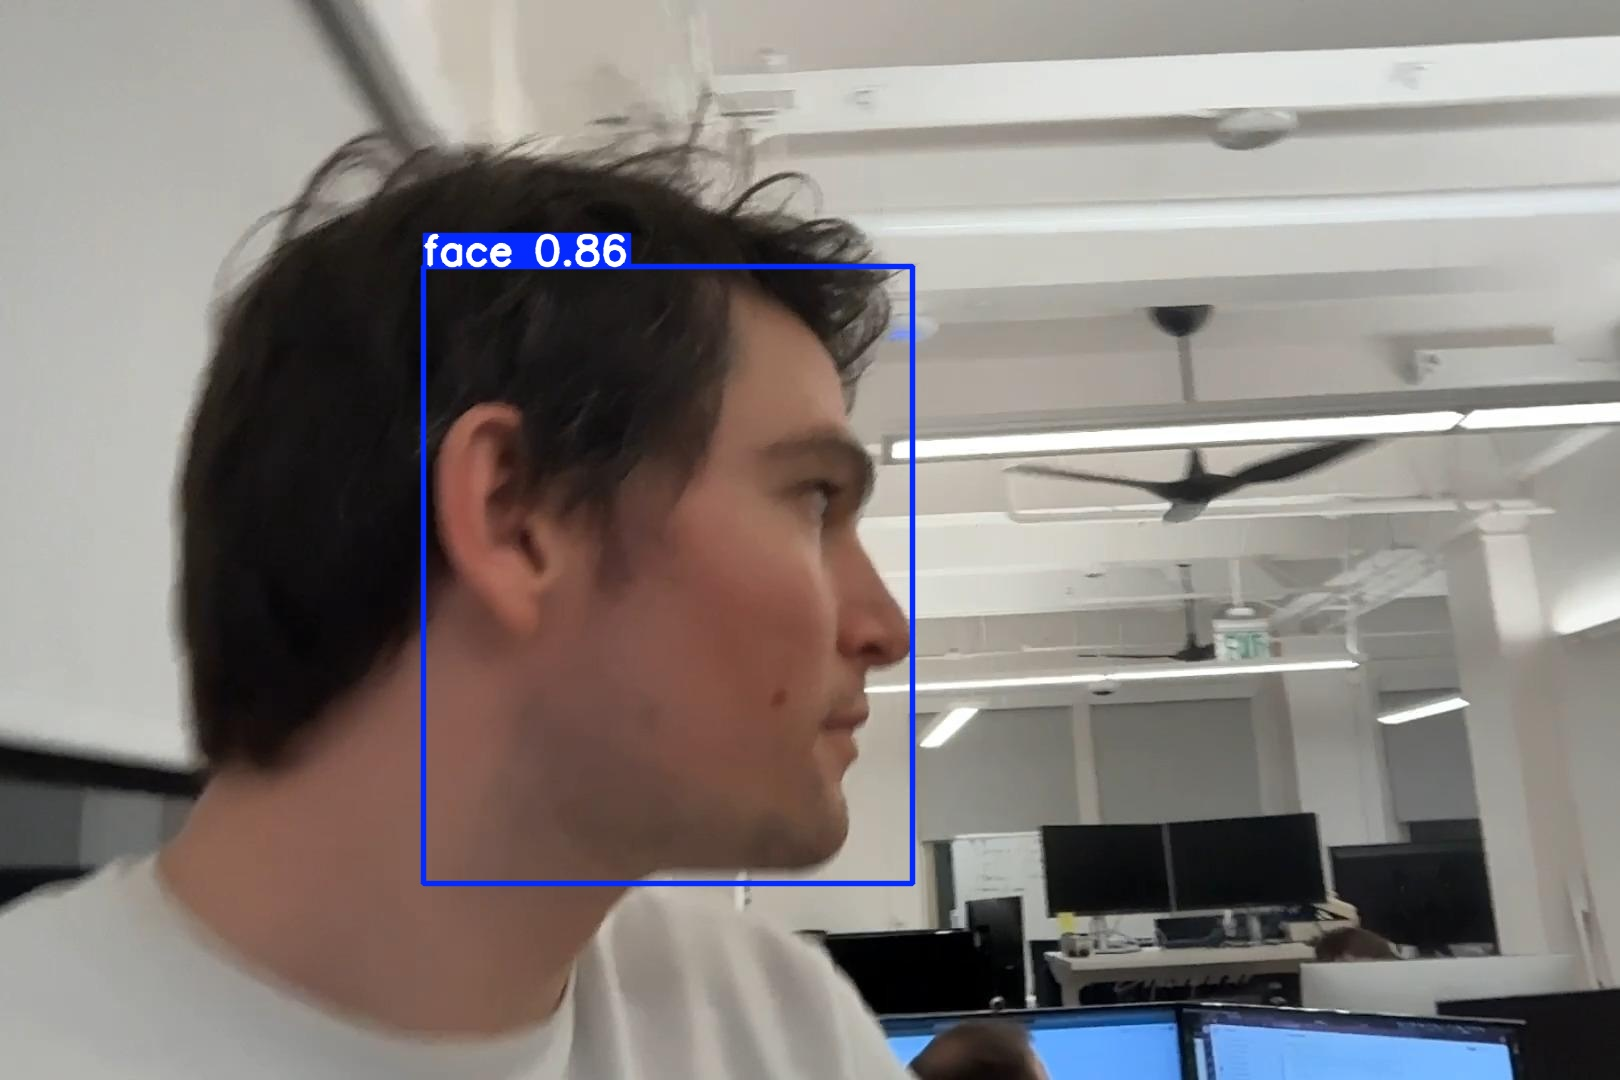

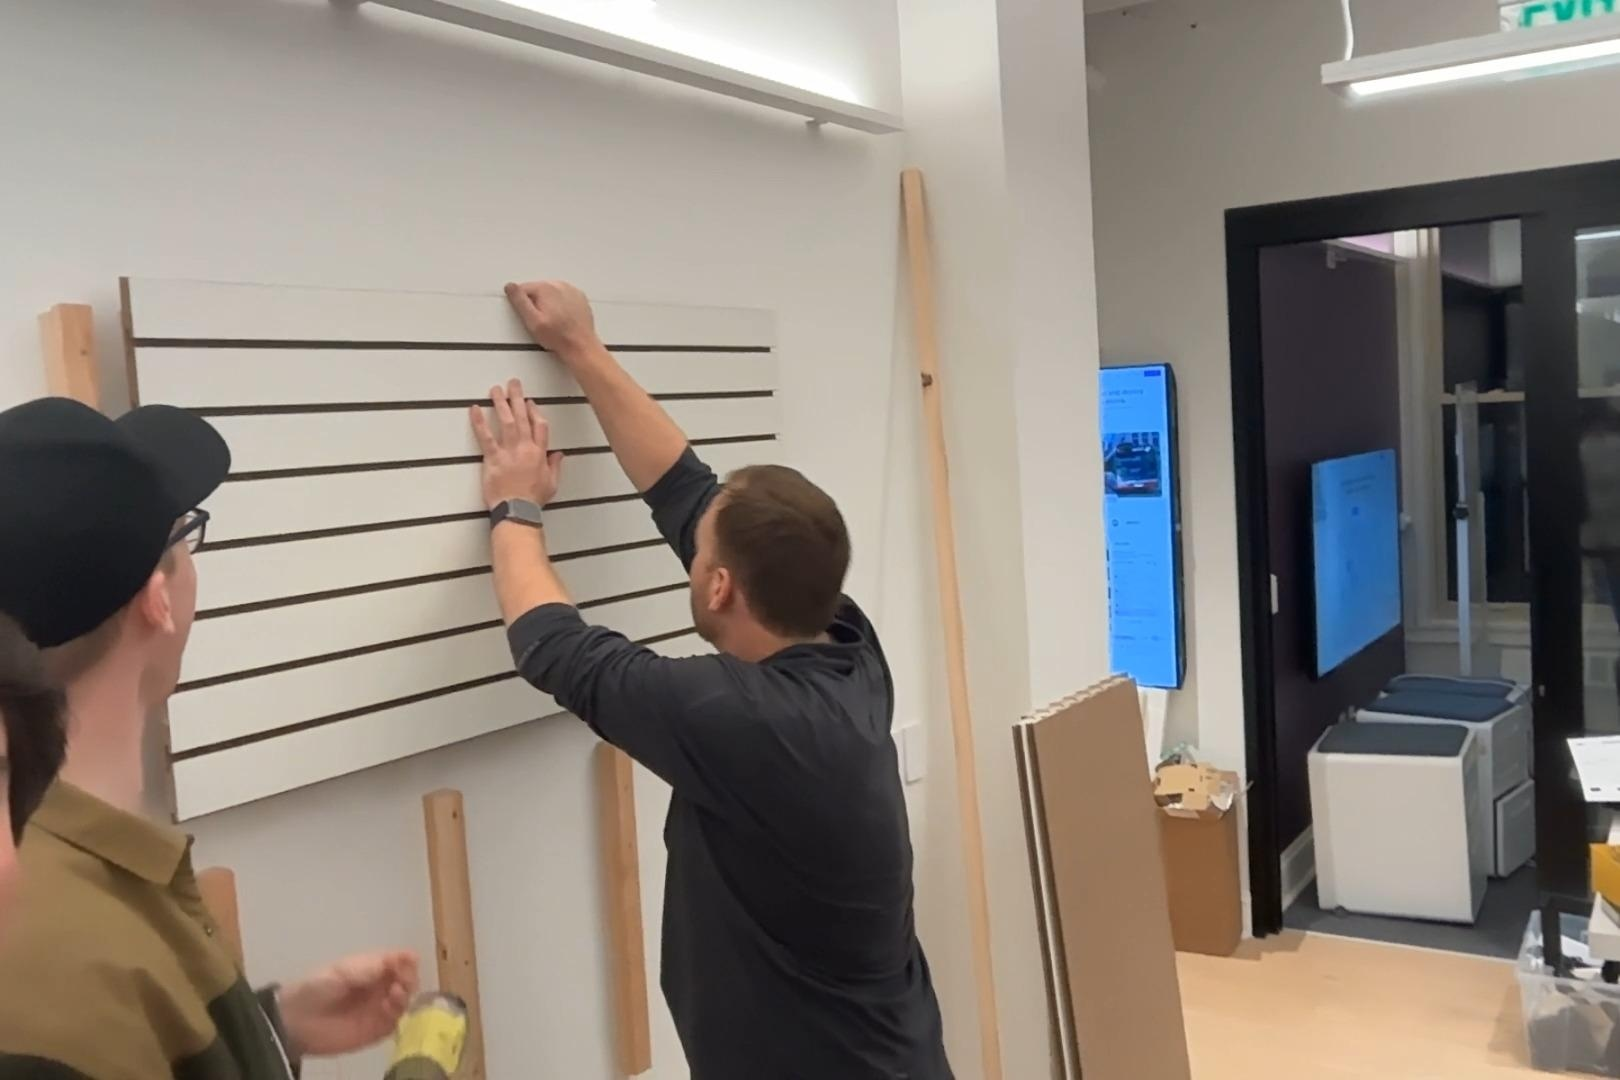

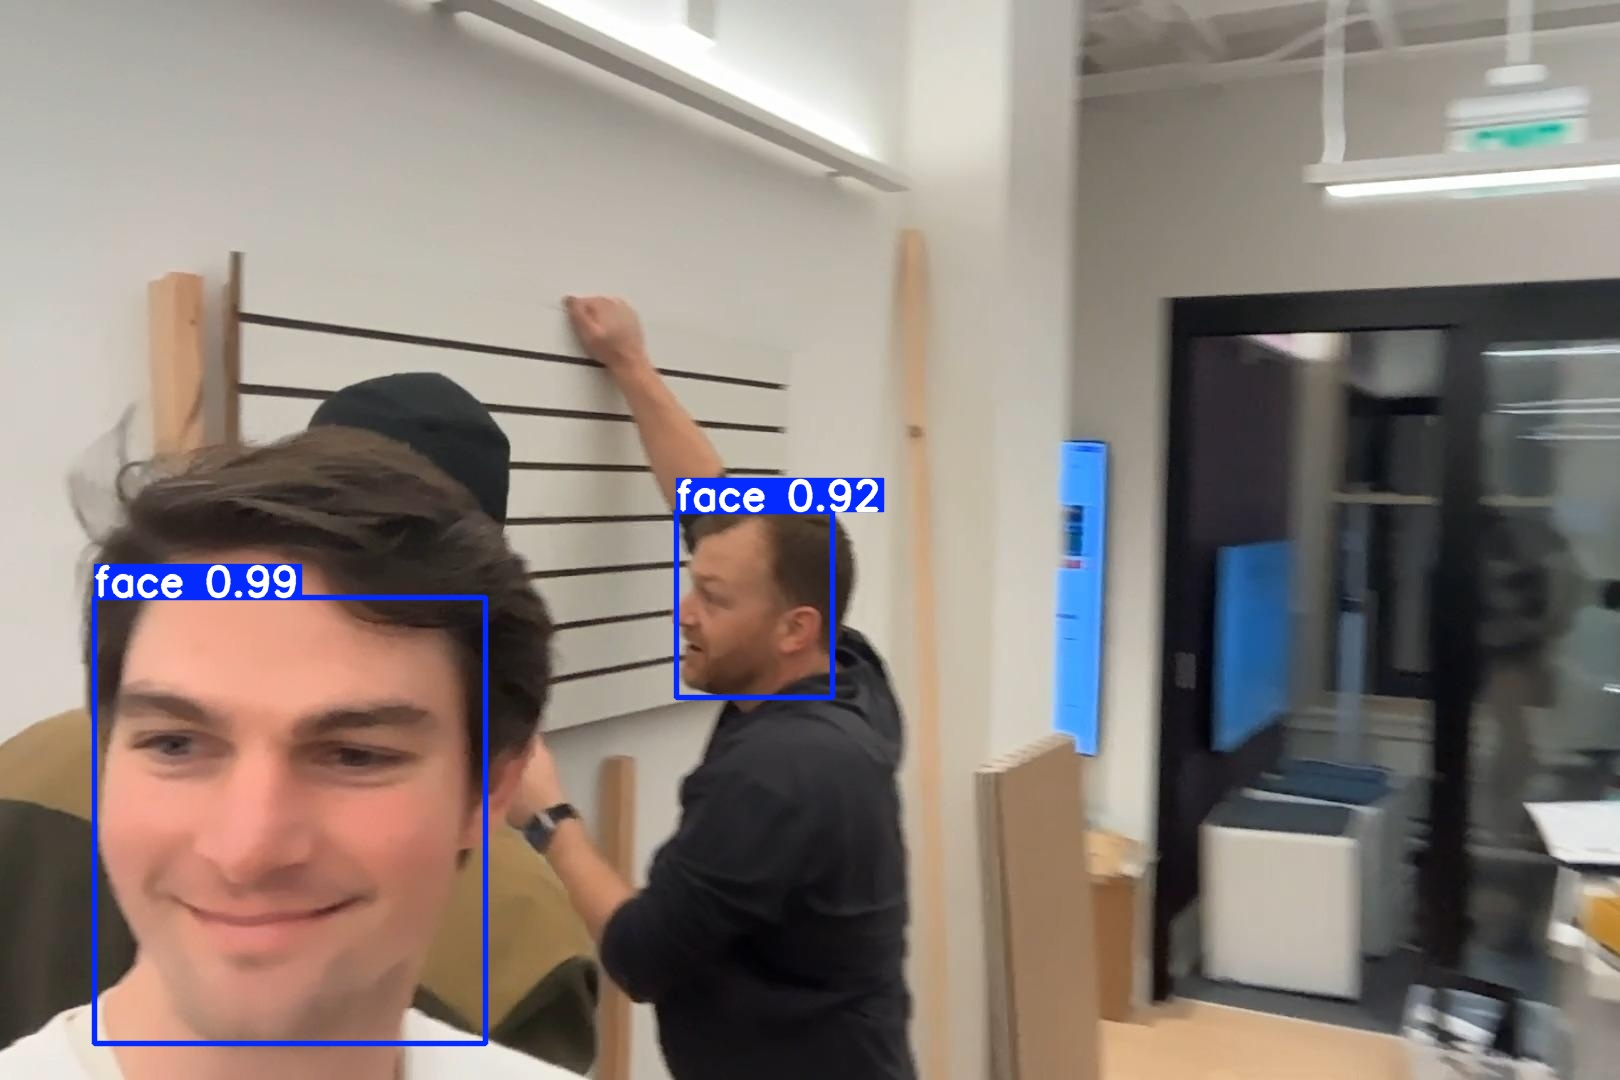

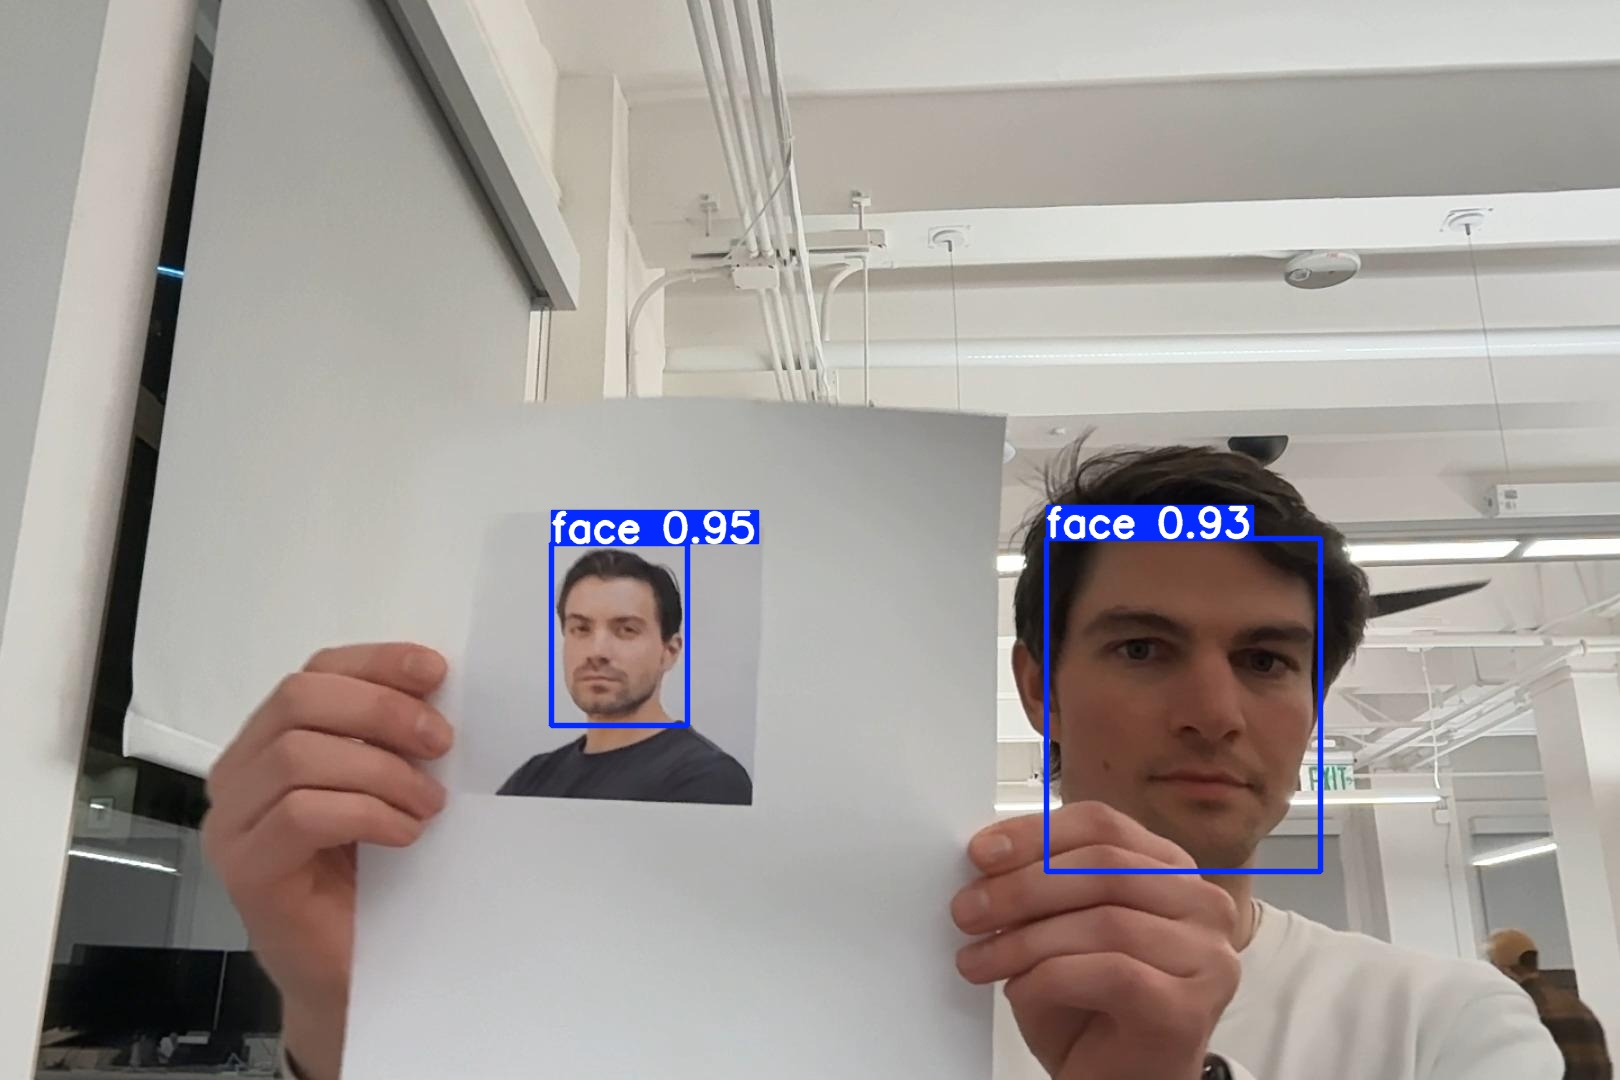

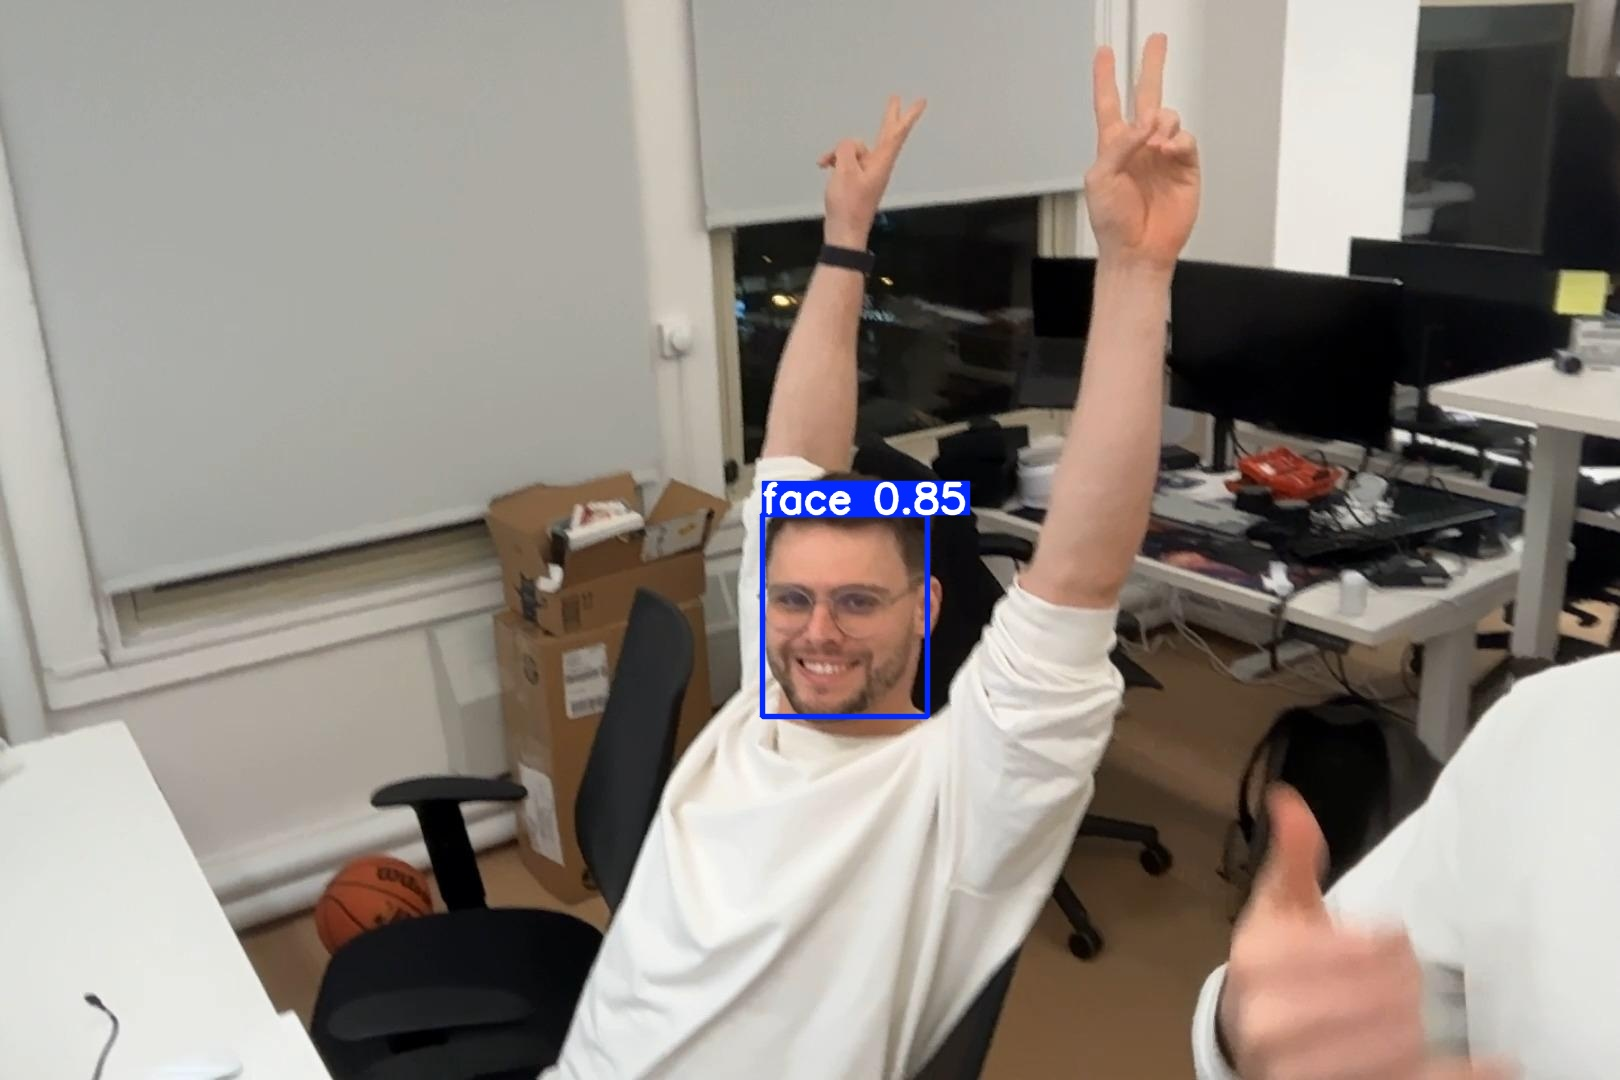

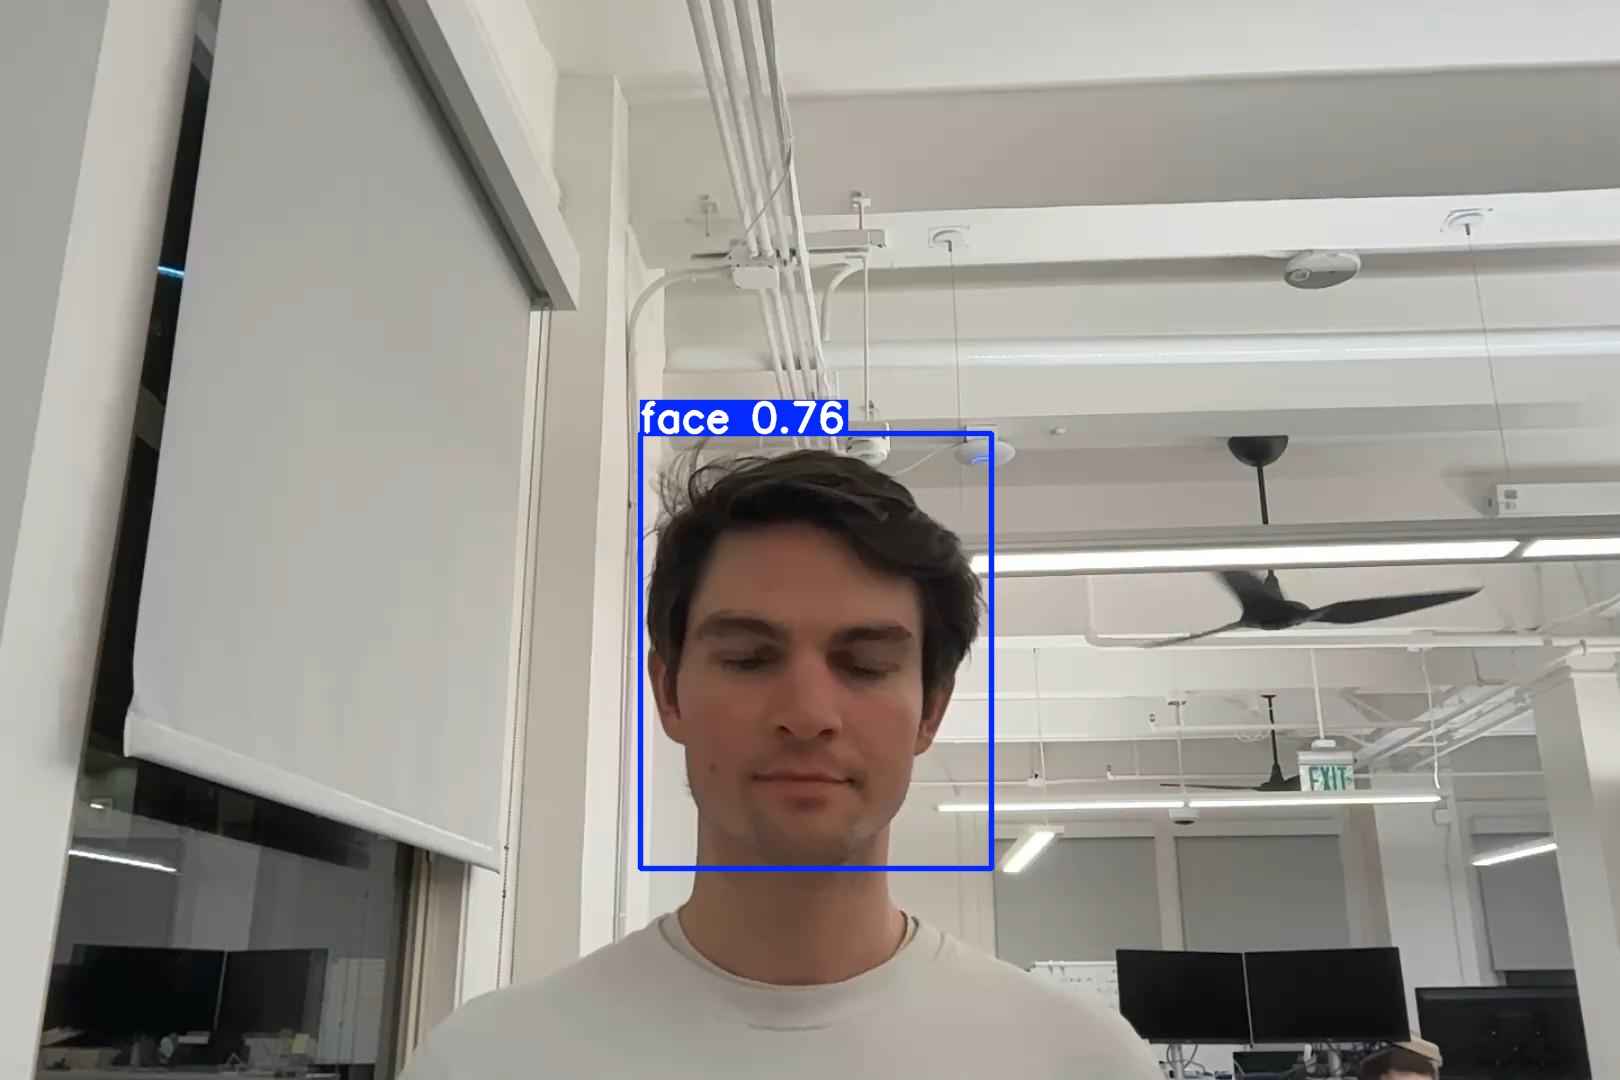

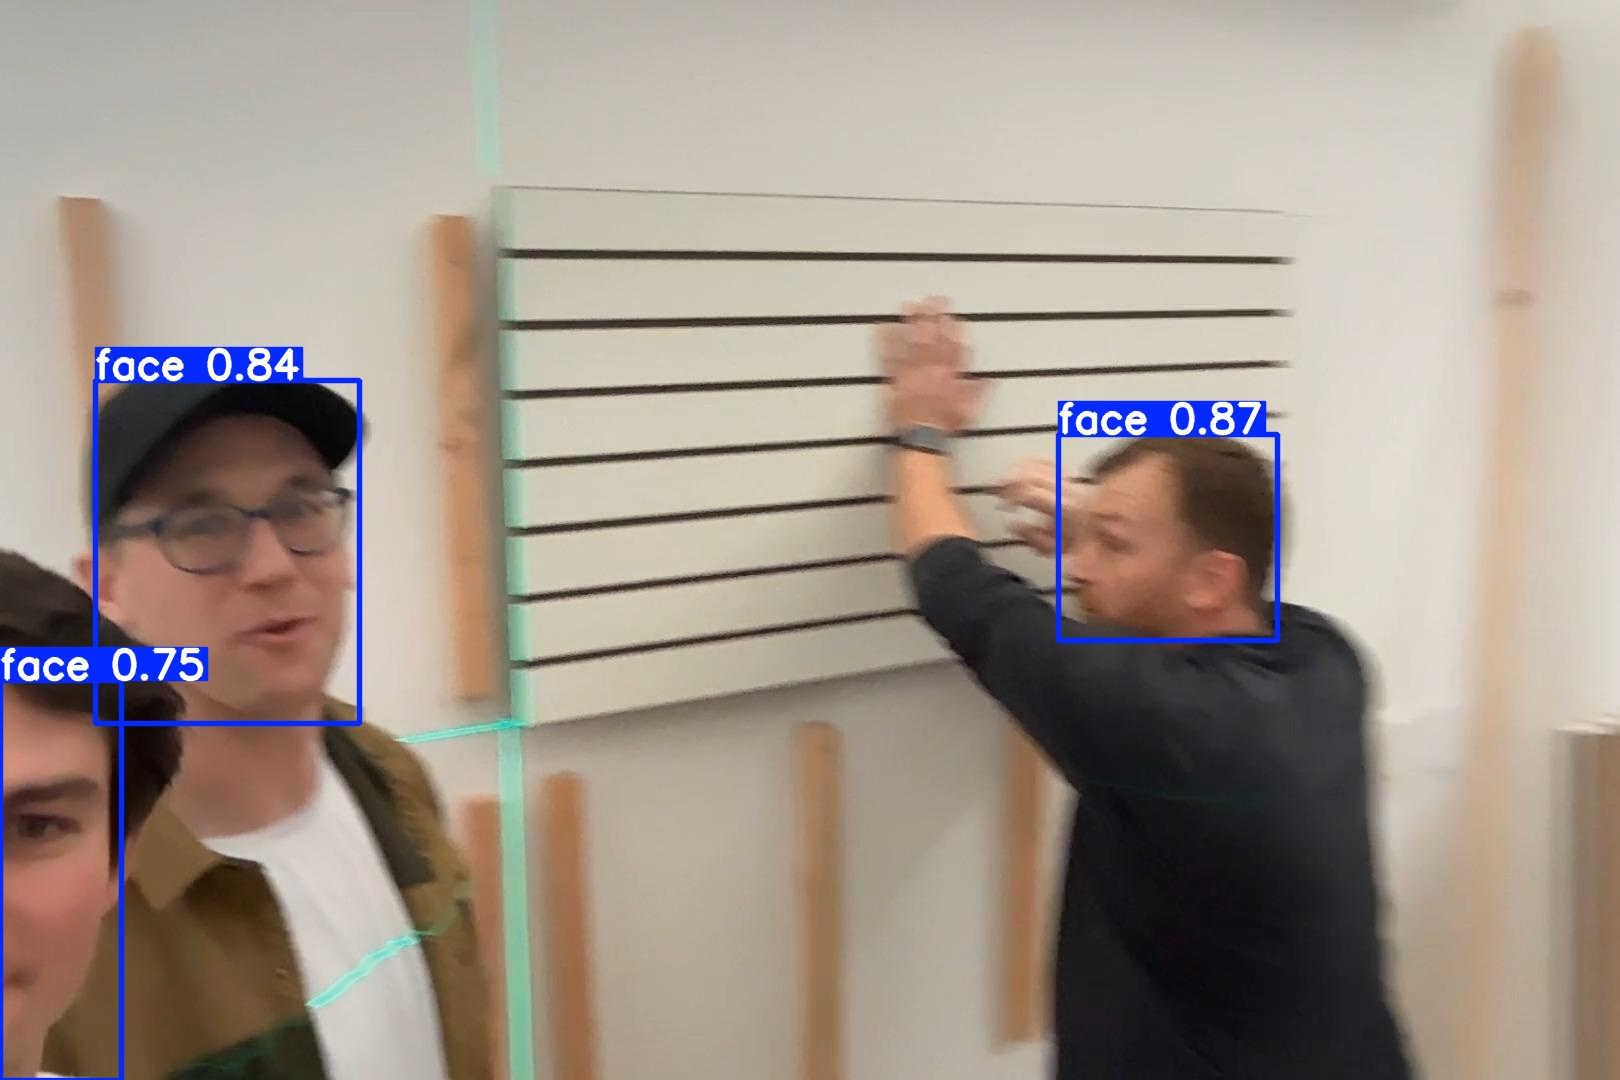

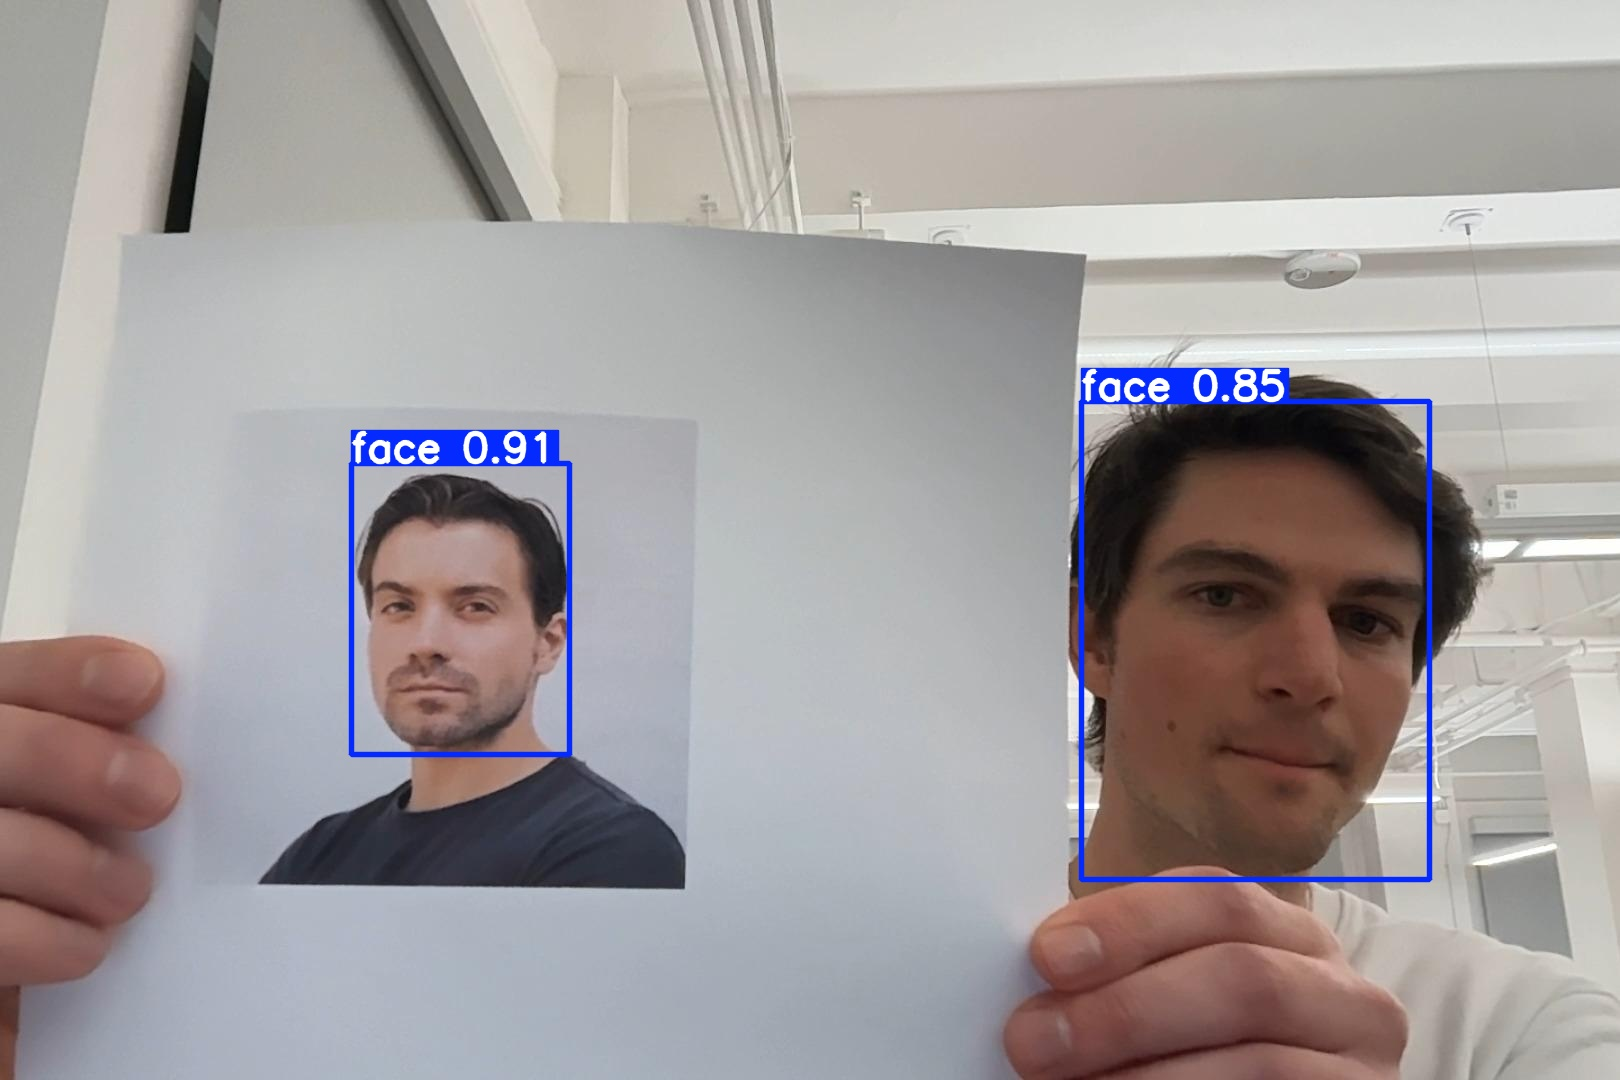

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=image_path, height=400))
